<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 5. Karst
## Carbon-isotope ratio (2-sinks model)
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany* 

In this notebook, we will extent the classical Rayleigh fractionation model to **two sinks**, which
we then use to model the fractionation of **carbon isotopes** in a solution precipitating calcite.

We therefore first discuss precipitation of calcite from a thin water film running down a stalagmite:

We recall: 
- Water enriched in atmospheric carbon dioxide seeps down. the higher carbon-dioxide
concentration in the soil elevated the CO$_2$ concentration. 
- Once the water reaches limestone, calcite is dissolved according to
$$
CaCO_3 + H_2O + CO_2 <=> Ca^{2+} + 2 HCO_3^-
$$
until the calcium equilibrium concentration is reached.
- Both calcium and bicarbonate move down wihtin the solution.
- In an air-filled cave, CO$_2$ concentration is lower, the solution becomes super-saturated,
and calcite precipitates.

<img src="images/precipitation_isotopes.jpg">

Considering **carbon** first, carbon is contained in the bicarbonate (HCO$_3^-$), and upon precipitation
migrates both to the solid calcite (CaCO$_3$) and the cave atmosphere (CO$_2$). For the carbon, we thus 
have **two sinks**, the atmosphere and the calcite.

During precipitation the **carbon-isotope ratio** is changed. This is what we want to model.

We first load the `python` libraries `numpy` and `matplotlib`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def change_fonts():
    SMALL_SIZE = 15
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 25

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
change_fonts()

## Two sinks

We continue with Rayleigh fractionation with **two sinks**.

<img src="images/rayleigh_2sinks.jpg">

Again the number of particles $N$ and the isotope ratio $R$ in the original reservoir (left side).

Once fractionation starts, we need to consider two sinks (right side), which obtain the partitioned
amount of molecules, with partition factors $f_1$ and $f_2$, and $f_1+f_2=1$.

----
### Balance equation
As before, balancing the left and right sides results in
$$
N R = (N+\frac{dN}{dt}\Delta t)(R+dR) - \frac{dN}{dt}\Delta t f_1 \alpha_1 R
                                        - \frac{dN}{dt}\Delta t f_2 \alpha_2 R
$$

----
### Numerical solution
Expanding the balance equation and neglecting terms higher order ($dR dN$ is small):
$$
\fbox{$
R_{i} = R_{i-1} + dR_{i-1}
      = R_{i-1} + \frac{R_{i-1}}{N_{i-1}} \left(f_1\alpha_1 + f_2\alpha_2 - 1 \right) \left(N_{i}-N_{i-1} \right)
$}
$$

----
### Analytical solution

We separate the differential equation into variables:
$$
\frac{dR}{R} = (\alpha_1 f_1 + \alpha_2 f_2 - 1) \frac{dN}{N}
$$

Following the same solution strategy as above, the resulting **Rayleigh fractionation** is:
$$
\fbox{$
\frac{R}{R_0} = \left( \frac{N}{N_0} \right)^{\alpha_1 f_1 + \alpha_2 f_2 - 1}
$}
$$
Note that part of the exponent is often summarized into
$\bar{\alpha}=\alpha_1 f_1 + \alpha_2 f_2$.

Formulated in the delta-notation, we define a reference state $\delta_0$ and arrive at:
$$
\delta = (1+\delta_0) \left( \frac{N}{N_0} \right)^{\epsilon_1 f_1 + \epsilon_2 f_2} - 1
$$

----
## $^{13}$C isotopic fractionation

The fractionation factors for the $\frac{^{13}C}{^{12}C}$ fractionation are taken from
literature sources as functions of temperature:

In [2]:
'''
fractionation factors for 13C fractionation
from Romanov et al. (2008b), Mühlinghaus et al. (2007)
equilibrium values:
- alpha1: HCO3- -> CaCO3
- alpha2: HCO3- -> CO2
kinetical values:
- alpha1k: HCO3- -> CaCO3
- alpha2k: HCO3- -> CO2
'''
def fractionation_factors_carbon(T=10.):
    Tk = T + 273.15
    alpha1 = -4.232/Tk + 1.0151
    alpha2 = -9.483/Tk + 1.02389
    alpha1k = 1.*Tk/Tk
    alpha2k = 0.988*alpha2
    alpha2scholz = 1.+np.exp((- 9483/Tk + 23.89)/1000)-1 #isotope enrichment factor, HCO3 -> CO2^{g} (Mook 1974)
    alpha1scholz = 1.+((- 4232./Tk + 15.10) / 1000)   #isotope enrichment factor, HCO3 -> CaCO3 (Mook 2000)
    return alpha1,alpha2,alpha1k,alpha2k,alpha1scholz,alpha2scholz

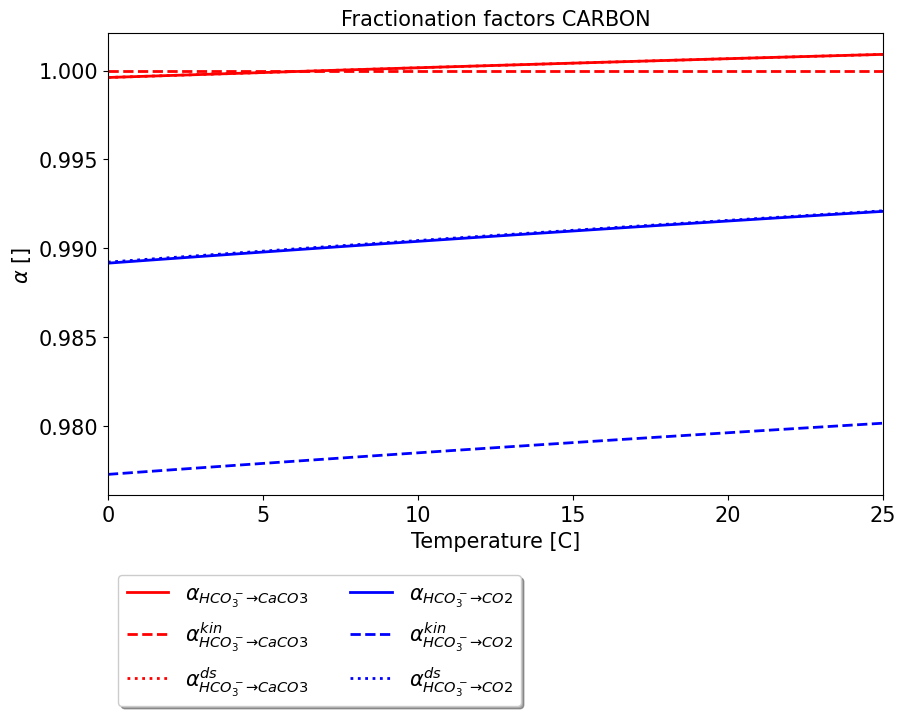

In [3]:
# define temperature range
T   = np.linspace(0,25,26)
# caclulate carbon fractionation factors
alpha1,alpha2,alpha1k,alpha2k,alpha1scholz,alpha2scholz = fractionation_factors_carbon(T)

# plotting
change_fonts()
plt.figure(figsize=[10,6])
plt.title('Fractionation factors CARBON')
plt.xlabel('Temperature [C]')
plt.xlim([0,25])
plt.ylabel('$\\alpha$ []')
#plt.set_ylim([0,1.1*cin])
plt.plot(T,alpha1,linewidth='2',color='red',linestyle='-',label='$\\alpha_{HCO_3^- \\to CaCO3}$')
plt.plot(T,alpha1k,linewidth='2',color='red',linestyle='--',label='$\\alpha^{kin}_{HCO_3^- \\to CaCO3}$')
plt.plot(T,alpha1scholz,linewidth='2',color='red',linestyle=':',label='$\\alpha^{ds}_{HCO_3^- \\to CaCO3}$')
plt.plot(T,alpha2,linewidth='2',color='blue',linestyle='-',label='$\\alpha_{HCO_3^- \\to CO2}$')
plt.plot(T,alpha2k,linewidth='2',color='blue',linestyle='--',label='$\\alpha^{kin}_{HCO_3^- \\to CO2}$')
plt.plot(T,alpha2scholz,linewidth='2',color='blue',linestyle=':',label='$\\alpha^{ds}_{HCO_3^- \\to CO2}$')
plt.legend(loc='upper left', bbox_to_anchor=(0.0, -0.15),shadow=True, ncol=2)
plt.show()

----
## Evolution of carbon-isotope ratio

We calculate the evolution of the calcite layer deposited along a stalagmite.
The incoming solution (drop) has a temperature of $T=10^{\circ}$C and a bi-carbonate concentration of
$[HCO_3^-]=N_0=5$ mol/m$^3$, thus over-saturated with respect to calcium. The bi-carbonate equilibrium
concentration is set to $[HCO_3^-]_{eq}=N_{eq}=1$ mol/m$^3$. The initial isotope ratio is
$R_0=\frac{^{13}C}{^{12}C}=\frac{1.1\%}{98.9\%}\simeq 0.011$.
$$
R = \frac{^{13}C}{^{12}C}
$$

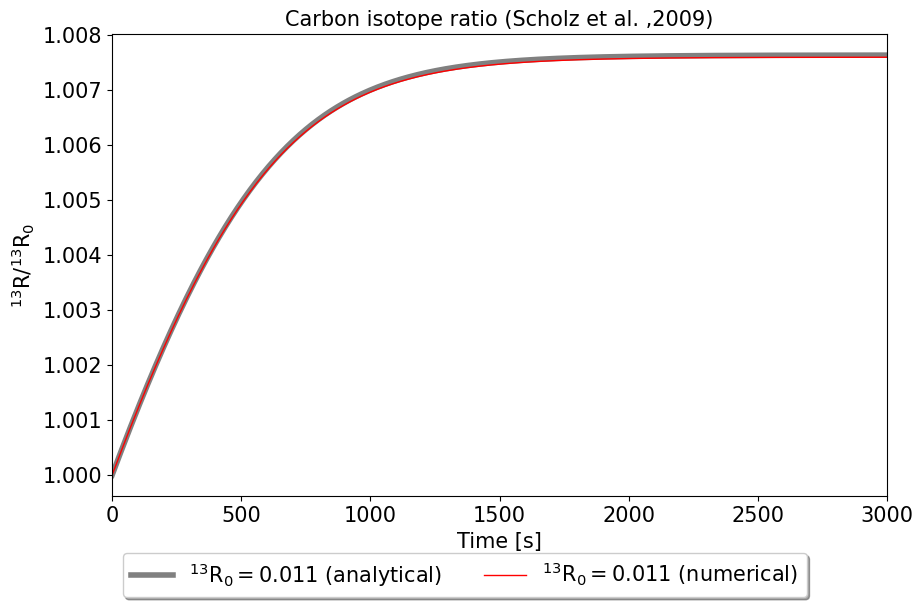

In [4]:
# calculate average fractionation factor
alpha1,alpha2,alpha1k,alpha2k,alpha1scholz,alpha2scholz = fractionation_factors_carbon(T=10)
alphabar   = 0.5*(alpha1 + alpha2)
epsilon13C = alphabar - 1.

# define time scale (in s)
t = np.linspace(0,3000,501)
tau1 = 300.
tau2 = 150.

# define bicarbonate concentration (N,N0, im mol/m3) and initial isotope ratio (R0)
R0   = 1.1/98.9 
N0   = 5.
Neq  = 1.

# number of HCO3- particles
N = (N0-Neq)*np.exp(-t/tau1) + Neq
# Fractionation factor analytical
Ra = R0*(N/N0)**epsilon13C
# Fractionation factor numerical
Rn = np.zeros(len(t))
Rn[0] = R0
for i in range(1,len(t)):
    Rn[i] = Rn[i-1] + Rn[i-1]*(N[i]-N[i-1])/N[i-1]*epsilon13C

# plotting
change_fonts()
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlim([0,3000])
ax1.set_title('Carbon isotope ratio (Scholz et al. ,2009)')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('$^{13}$R/$^{13}$R$_0$')
ax1.plot(t,Ra/R0,linewidth='4',color='grey',label='$^{13}$R$_0=$'+str(round(R0,3))+' (analytical)')
ax1.plot(t,Rn/R0,linewidth='1',color='red',label='$^{13}$R$_0=$'+str(round(R0,3))+' (numerical)')
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, -0.1),shadow=True, ncol=2)
plt.show()

Replotting in delta notation, using
$$
\delta^{13}C = \delta^{13}C_0 + 1000*(\frac{R}{R_0}-1)
$$
with $\delta^{13}C_0=-11$ permil the carbon-isotope ratio of the impinging drip:

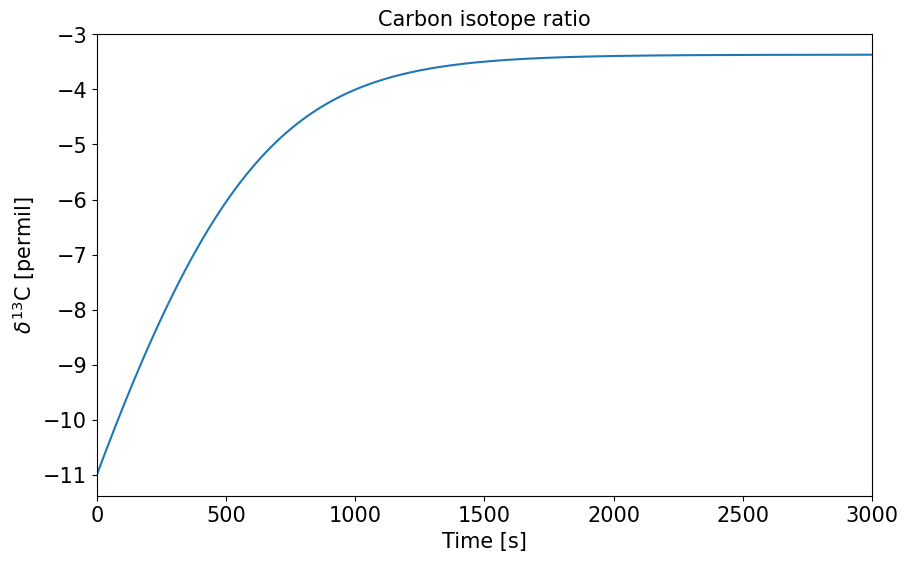

In [5]:
# plotting
change_fonts()
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlim([0,3000])
ax1.set_title('Carbon isotope ratio')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('$\delta^{13}$C [permil]')
plt.plot(t,-11+(Ra/R0-1)*1000)

----
## Time scale for calcite precipitation

Consider the reaction-diffusion-advection equation for species transport:
$$
\frac{dc}{dt} = \frac{A}{V} F(c)
$$
with $c$ [mol/m$^3$] the concentration,
$t$ [s] time,
$A$ [m$^2$] reactive surface area,
$V$ [m$^3$] volume of solution, and
$F$ [mol/m$^2$/s] calcium flux rate.
Alternatively, the ratio $\delta = \frac{A}{V}$ [m] is the thickness of the fluid film.

Note that advection and diffusion are not present ...

The calcium flux rate can be mapped in laboratory experiments, and a fit yields:
$$
F(c) = \alpha \left( c - c_{eq} \right),
$$
with $\alpha$ [m/s] a precipitation-rate coefficient, and
$c_{eq}$ [mol/m$^3$] the calcium equilibrium concentration.

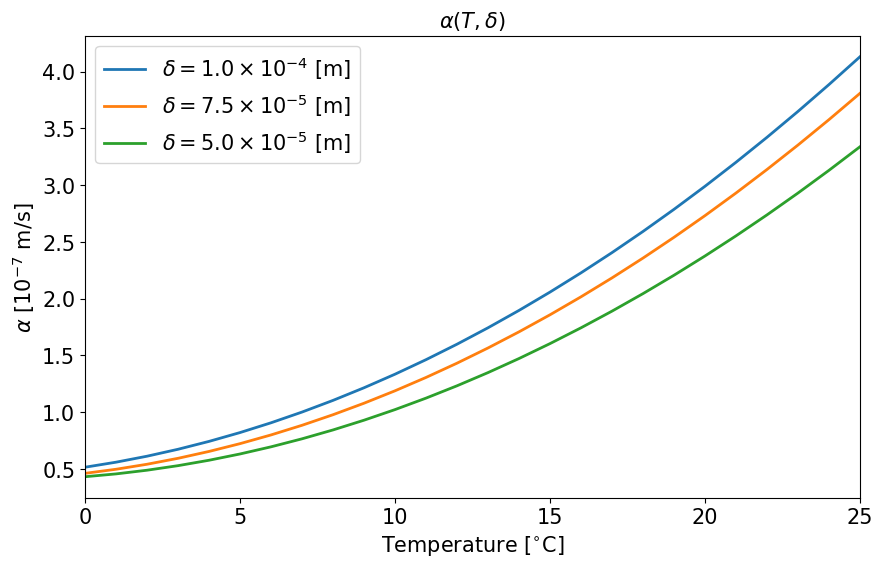

In [6]:
'''
**precipitation rate for flux rate**
follows Romanov et al. (2009)
'''
def chem_alpha(T=10.,d=0.0001):
    if (d >= 1.0e-4):
        chem_alpha = 1.e-7*(0.51549e0+0.04015e0*T+0.00418e0*T*T)
    elif (d >= 7.50e-5):
        chem_alpha = 1.e-7*(0.4615e0+0.03192e0*T+0.00408e0*T*T)
    elif (d >= 5.00e-5):
        chem_alpha = 1.e-7*(0.43182e0+0.02103e0*T+0.00381e0*T*T)
    else:
        chem_alpha = 0.
        print ('chem_alpha: film thickness d too small')
    return chem_alpha

T = np.linspace(0,25,26)
alpha_d1 = chem_alpha(T,d=1.0e-4)
alpha_d2 = chem_alpha(T,d=7.5e-5)
alpha_d3 = chem_alpha(T,d=5.0e-5)
# plotting
change_fonts()
plt.figure(figsize=[10,6])
plt.title('$\\alpha(T,\\delta)$')
plt.xlabel('Temperature [$^{\circ}$C]')
plt.xlim([0,25])
plt.ylabel('$\\alpha$ [$10^{-7}$ m/s]')
#plt.set_ylim([0,1.1*cin])
plt.plot(T,alpha_d1*1.e7,linewidth='2',label='$\\delta=1.0 \\times 10^{-4}$ [m]')
plt.plot(T,alpha_d2*1.e7,linewidth='2',label='$\\delta=7.5 \\times 10^{-5}$ [m]')
plt.plot(T,alpha_d3*1.e7,linewidth='2',label='$\\delta=5.0 \\times 10^{-5}$ [m]')
plt.legend()
plt.show()

A solution of the differential equation takes the form:
$$
c(t) = c_{eq} + (c_0 - c_{eq}) e^{-\frac{t}{\tau}}
$$
with 
$$
\tau = \frac{V}{A \alpha}
$$
the characteristic reaction time [s]:

In [7]:
delta = np.array([1e-4,7.5e-5,5e-5])
T = 10
tau = np.empty([])
print("%10s %10s" % ('delta[m]','tau[s]'))
for i in range(len(delta)):
    tau = np.append(tau,delta[i]/chem_alpha(T,delta[i]))
    print("%10.5f %10.2f" % (delta[i],tau[i]))

  delta[m]     tau[s]
   0.00010     155.72
   0.00007     749.07
   0.00005     630.94


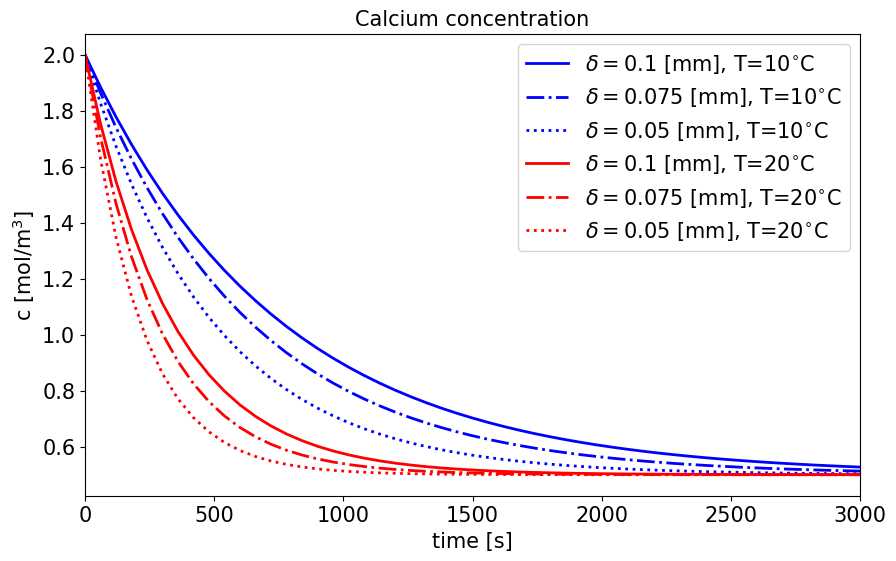

In [8]:
c0 = 2.
ceq = 0.5
t = np.linspace(0,3000,51)
delta = np.array([1.e-4,7.5e-5,5e-5])

c1 = ceq + (c0-ceq)*np.exp(-t/(delta[0]/chem_alpha(10,delta[0])))
c2 = ceq + (c0-ceq)*np.exp(-t/(delta[1]/chem_alpha(10,delta[1])))
c3 = ceq + (c0-ceq)*np.exp(-t/(delta[2]/chem_alpha(10,delta[2])))

c4 = ceq + (c0-ceq)*np.exp(-t/(delta[0]/chem_alpha(20,delta[0])))
c5 = ceq + (c0-ceq)*np.exp(-t/(delta[1]/chem_alpha(20,delta[1])))
c6 = ceq + (c0-ceq)*np.exp(-t/(delta[2]/chem_alpha(20,delta[2])))

# plotting
change_fonts()
plt.figure(figsize=[10,6])
plt.title('Calcium concentration')
plt.xlabel('time [s]')
plt.xlim([t.min(),t.max()])
plt.ylabel('c [mol/m$^3$]')
#plt.set_ylim([0,1.1*cin])
plt.plot(t,c1,linewidth='2',linestyle='-',color='blue',
         label='$\\delta=$'+str(round(1000*delta[0],4))+' [mm], T=10$^{\circ}$C')
plt.plot(t,c2,linewidth='2',linestyle='-.',color='blue',
         label='$\\delta=$'+str(round(1000*delta[1],4))+' [mm], T=10$^{\circ}$C')
plt.plot(t,c3,linewidth='2',linestyle=':',color='blue',
         label='$\\delta=$'+str(round(1000*delta[2],4))+' [mm], T=10$^{\circ}$C')

plt.plot(t,c4,linewidth='2',linestyle='-',color='red',
         label='$\\delta=$'+str(round(1000*delta[0],4))+' [mm], T=20$^{\circ}$C')
plt.plot(t,c5,linewidth='2',linestyle='-.',color='red',
         label='$\\delta=$'+str(round(1000*delta[1],4))+' [mm], T=20$^{\circ}$C')
plt.plot(t,c6,linewidth='2',linestyle=':',color='red',
         label='$\\delta=$'+str(round(1000*delta[2],4))+' [mm], T=20$^{\circ}$C')

plt.legend()
plt.show()

... done